# 機器學習_ML_KNN_KNearestNeighbors_最近鄰居
###### tags: `ML` `KNN` `KNearestNeighbors`
[官方連結](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
KNN是一種惰式學習器，它不會從訓練資料集中學出判別函數，而是把訓練資料集記憶起來。
在學習過程中是沒有成本的!
三步驟：
1. 選定k值和一個距離度量  
2. 找出k個想要分類的最相近的鄰近樣本  
3. 以多數決方式來指定類別標籤  

根據選定的距離度量來針對某個新分類的點做判斷，多數決!  
  
KNN對異常的容忍度高，畢竟是取最接近的K點來做多數決，但相對的，計算量也不小。預設情況下，都是相同權重，如果有需求也可以透過權重設置來對不同的鄰居做不同的權重設置。  
還有一種為『RadiusNeighborsClassifier』，可以設置相鄰範圍，這對數據分佈不均的資料集有較好的效果，這部份我們另篇說明。    
  
<div style="background:#fcf8e3">
Warning
Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data.  
官方說明到，如果兩個鄰居具有相同權重，具相同距離但不同label的話，其結果取決於訓練資料集的順序。  
</div>

## IMPORT
```
from sklearn.neighbors import KNeighborsClassifier
```
## CLASS
```
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, 
                weights='uniform', algorithm='auto',
                leaf_size=30, p=2, metric='minkowski', 
                metric_params=None, n_jobs=1, **kwargs)
```

## 參數說明
### n_neighbors
int, optional (default = 5)  
K值，以幾個點來決定預測點。  
### weights
str or callable, optional (default = 'uniform')  
uniform：預設置，相同權重  
distance：愈接近的權重愈高  
也可以自定義  
### algorithm
{'auto', 'ball_tree', 'kd_tree', 'brute'}, optional  
計算最近鄰居的演算法，資料量少的時候以brute即可，多一點但維度少於20的時候以kt_tree，再多一點就使用ball_tree，不過一般建議使用auto讓演算法自行決定即可。  
auto：學習的時候會自動選擇(一般選擇此項)  
brute：暴力解  
### leaf_size
int, optional (default = 30)  
葉節點的大小，不影響結果，但影響速度以及結構樹的存儲空間。  
結構樹的存儲空間需求記憶體用量為n\_samples / leaf\_size  
一般取預設值即可。  
### p
integer, optional (default = 2)  
default 2  
1_曼哈頓距離(只能直角)  
2_歐氏距離  
### metric
string or callable, default 'minkowski'  
『the distance metric to use for the tree』，樹的距離度量。  
一般來說取預設值即可，如果有其它需求的話可以參考官方[Distance metric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)  
```
minkowski=sum(|x - y|^p)^(1/p)
```
### metric_params
dict, optional (default = None)  
如果有使用其它的Distance metric，相關特殊參數可由此設置。  
更多情況使用預設值即可滿足。  
### n_jobs
int, optional (default = 1)  
訓練時的cpu使用數  
設置-1則火力全開  

## 方法說明
### fit(X, y)
擬合、訓練
### get_params([deep])
取得模型參數
### kneighbors([X, n_neighbors, return_distance])
找出輸入X的鄰居與距離，如果沒有給值的話會回傳訓練模型的資料。  
每個點的最近鄰居都是自己，所以距離都為0。  
### kneighbors_graph([X, n_neighbors, mode])
回傳最近鄰居的矩陣圖，1是最近點，0非最近點。
### predict(X)
回傳預測類別
### predict_proba(X)
回傳機率
### score(X, y[, sample_weight])
取得平均精準度(mean accuracy)
### set_params(**params)
設置模型參數

## 範例
透過簡單的範例來了解部份method所產生的結果

In [1]:
#  載入需求演算法，借用無監督式演算法說明
from sklearn.neighbors import NearestNeighbors

In [2]:
#  設置簡單的資料集
X = [[0], [1], [3], [15], [7]]

In [3]:
#  實作模型
nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=1.0)

In [4]:
#  取得矩陣圖，並且之轉為陣列
#  顯示的結果來看，1是鄰居，0不是鄰居，自己跟自己一定是鄰居
#  n_neighbors設置為2，故有兩個1。最後一維來看，7跟3比跟15還要近，故7、3為1中間空了一個0。
a = nn.kneighbors_graph(X)
a.toarray()

array([[ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  1.]])

In [5]:
#  回傳兩個資料，與鄰居距離與鄰居索引
#  第一部份是鄰居間的距離，自己最近的鄰居是自己，所以第一個值是0，第二個值是距離。
#  第二部份是自己跟鄰居的索引值，索引從0開始。
nn.kneighbors(X)

(array([[ 0.,  1.],
        [ 0.,  1.],
        [ 0.,  2.],
        [ 0.,  8.],
        [ 0.,  4.]]), array([[0, 1],
        [1, 0],
        [2, 1],
        [3, 4],
        [4, 2]], dtype=int64))

透過上面的簡單範例可以了解到method回傳的資料意函，上面的範例借用了無監督式的演算法，故沒有y，請不要在意，method的功能是相同的。  
接下來，我們就可以來實作一個KNN的範例。

In [6]:
#  產生資料集
"""
n_samples：樣本數
centers：中心點，數值會依中心點分佈
cluster_std：樣本的標準差，這影響到數值
"""
from sklearn.datasets.samples_generator import make_blobs
centers = [[-1, -1], [0.5, 0.5], [2, 2]]
X,y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.5)

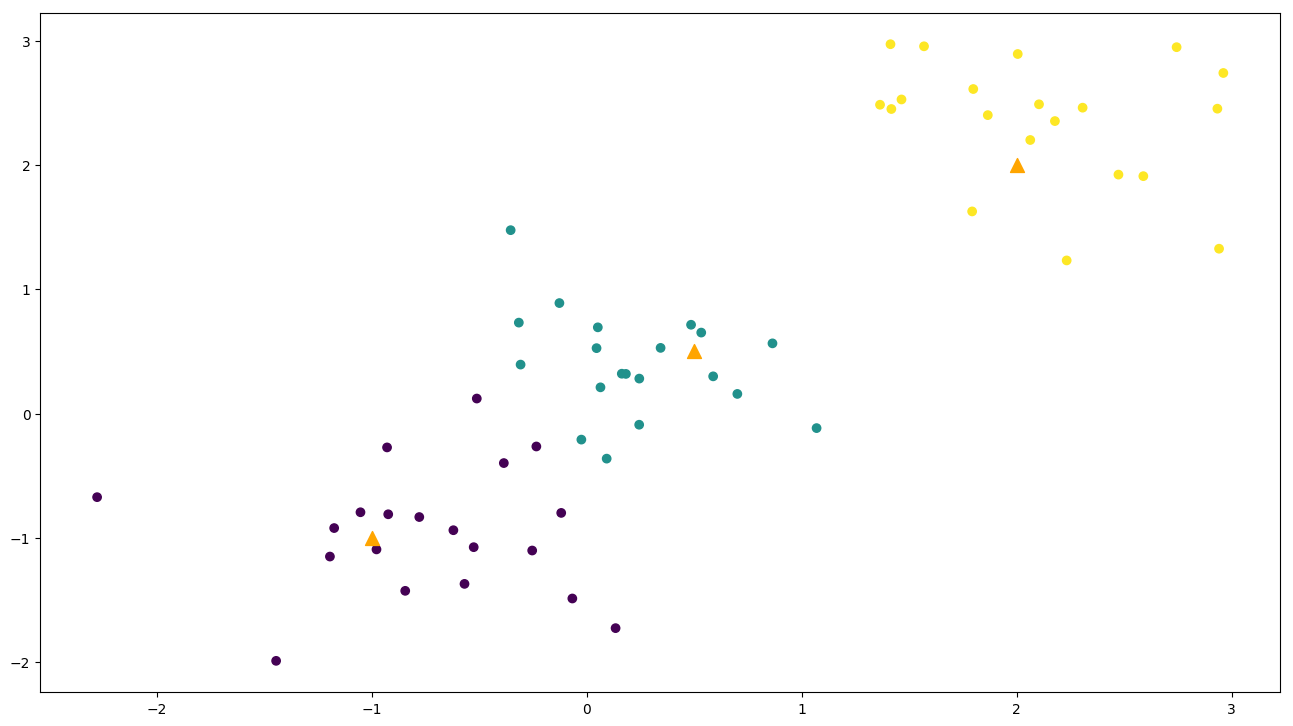

In [7]:
#  資料集設置完畢之後，記得先利用可視化方式確認資料集
#  查看資料集的分佈
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
cen = np.array(centers)
#  設置圖框大小
plt.figure(figsize=(16,9), dpi=100)
#  產生資料集散佈圖
plt.scatter(X[:, 0], X[:, 1], c=y)
#  繪製中心點
plt.scatter(cen[:, 0], cen[:, 1], s=100, marker='^', c='orange')
plt.show()

In [8]:
#  實作、訓練模型
#  在沒有特殊需求情況下，預設參數就可以有不錯的效果，我們單純的設置k
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
#  自己增加一個範本
X_test = [[1.5, 1]]
y_test = knn.predict(X_test)

In [11]:
#  單純回傳鄰居索引，不回傳距離
neighbors = knn.kneighbors(X_test, return_distance=False)
neighbors

array([[ 9, 35, 40, 51, 47]], dtype=int64)

In [12]:
#  查看y_test，被歸於1
y_test

array([1])

In [13]:
#  查詢概率，有三個中心點，所以有三類，y=1的機率最高。
knn.predict_proba(X_test)

array([[ 0. ,  0.6,  0.4]])

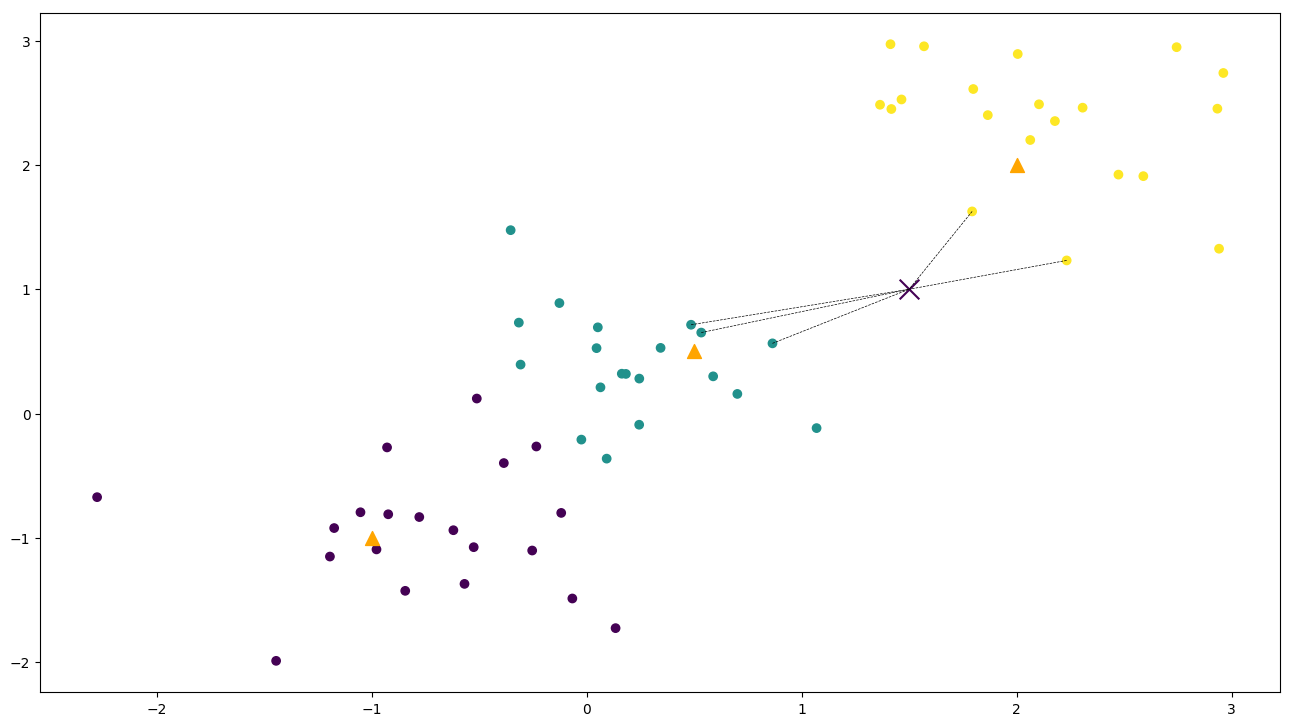

In [14]:
#  將資料可視化呈現
import matplotlib.pyplot as plt
import numpy as np
cen = np.array(centers)
plt.figure(figsize=(16,9), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(cen[:, 0], cen[:, 1], s=100, marker='^', c='orange')
#  加入預測點x
plt.scatter(X_test[0][0], X_test[0][1], marker='x', c=y_test, s=200)
#  產生於測點與鄰居的連接線
for i in neighbors[0]:
    plt.plot([X[i][0], X_test[0][0]], [X[i][1], X_test[0][1]], 'k--', linewidth=0.5)
plt.show()